# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [ ]:
# your code here
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Read tic-tac-toe.csv into a dataframe.
df = pd.read_csv('tic-tac-toe.csv')
# 2. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
df.head()

In [2]:
# 3. Convert the categorical values to numeric in all columns.
# 4. Separate the inputs and output.
# 5. Normalize the input data.
ttt_dummies = pd.get_dummies(df)
ttt_dummies["class"] = ttt_dummies["class"].astype(int)
ttt_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 28 columns):
class    958 non-null int64
TL_b     958 non-null uint8
TL_o     958 non-null uint8
TL_x     958 non-null uint8
TM_b     958 non-null uint8
TM_o     958 non-null uint8
TM_x     958 non-null uint8
TR_b     958 non-null uint8
TR_o     958 non-null uint8
TR_x     958 non-null uint8
ML_b     958 non-null uint8
ML_o     958 non-null uint8
ML_x     958 non-null uint8
MM_b     958 non-null uint8
MM_o     958 non-null uint8
MM_x     958 non-null uint8
MR_b     958 non-null uint8
MR_o     958 non-null uint8
MR_x     958 non-null uint8
BL_b     958 non-null uint8
BL_o     958 non-null uint8
BL_x     958 non-null uint8
BM_b     958 non-null uint8
BM_o     958 non-null uint8
BM_x     958 non-null uint8
BR_b     958 non-null uint8
BR_o     958 non-null uint8
BR_x     958 non-null uint8
dtypes: int64(1), uint8(27)
memory usage: 32.8 KB


In [3]:
cols = ttt_dummies.columns
cols

Index(['class', 'TL_b', 'TL_o', 'TL_x', 'TM_b', 'TM_o', 'TM_x', 'TR_b', 'TR_o',
       'TR_x', 'ML_b', 'ML_o', 'ML_x', 'MM_b', 'MM_o', 'MM_x', 'MR_b', 'MR_o',
       'MR_x', 'BL_b', 'BL_o', 'BL_x', 'BM_b', 'BM_o', 'BM_x', 'BR_b', 'BR_o',
       'BR_x'],
      dtype='object')

In [4]:
y_df = ttt_dummies["class"]

In [5]:
X_df = ttt_dummies.drop(columns = 'class')
X_df.head()

,TL_b,TL_o,TL_x,TM_b,TM_o,TM_x,TR_b,TR_o,TR_x,ML_b,...,MR_x,BL_b,BL_o,BL_x,BM_b,BM_o,BM_x,BR_b,BR_o,BR_x
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [24]:
y_df.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [28]:
# your code here
# 1. Split the training and test data.
x_train, x_test, y_train, y_test = [np.array(elemnt, dtype = float) for elemnt in [x_train, y_train, x_test, y_test]]

print(f"{x_train.shape}{type(x_train)} \t {y_train.shape}{type(y_train)}")
print(f"{x_test.shape}{type(x_test)} \t {y_test.shape}{type(y_test)}")

(718, 27)<class 'numpy.ndarray'> 	 (718,)<class 'numpy.ndarray'>
(240, 27)<class 'numpy.ndarray'> 	 (240,)<class 'numpy.ndarray'>


In [29]:
# 2. Create a `Sequential` model.
# 3. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [30]:
# 4. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [31]:
# 5. Fit the training data.
# 6. Evaluate your neural network model with the test data.
history = model.fit(x_train, 
                    y_train, 
                    batch_size=50, 
                    epochs=50, 
                    validation_data=(x_test, y_test))

Train on 718 samples, validate on 240 samples
Epoch 1/50
718/718 [==============================] - 0s 450us/sample - loss: 0.6856 - acc: 0.5571 - val_loss: 0.6205 - val_acc: 0.6875
Epoch 2/50
718/718 [==============================] - 0s 137us/sample - loss: 0.6256 - acc: 0.6435 - val_loss: 0.5946 - val_acc: 0.7000
Epoch 3/50
718/718 [==============================] - 0s 90us/sample - loss: 0.5955 - acc: 0.7047 - val_loss: 0.5815 - val_acc: 0.7708
Epoch 4/50
718/718 [==============================] - 0s 137us/sample - loss: 0.5698 - acc: 0.7577 - val_loss: 0.5611 - val_acc: 0.7792
Epoch 5/50
718/718 [==============================] - 0s 135us/sample - loss: 0.5466 - acc: 0.7772 - val_loss: 0.5457 - val_acc: 0.7917
Epoch 6/50
718/718 [==============================] - 0s 141us/sample - loss: 0.5291 - acc: 0.7939 - val_loss: 0.5338 - val_acc: 0.7917
Epoch 7/50
718/718 [==============================] - 0s 126us/sample - loss: 0.5114 - acc: 0.8162 - val_loss: 0.5161 - val_acc: 0.8208
Epo

In [34]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=64, 
                    epochs=5, 
                    validation_data=(x_test, y_test))

Train on 718 samples, validate on 240 samples
Epoch 1/5
718/718 [==============================] - 0s 208us/sample - loss: 0.3150 - acc: 1.0000 - val_loss: 0.3300 - val_acc: 0.9833
Epoch 2/5
718/718 [==============================] - 0s 89us/sample - loss: 0.3147 - acc: 1.0000 - val_loss: 0.3294 - val_acc: 0.9833
Epoch 3/5
718/718 [==============================] - 0s 76us/sample - loss: 0.3147 - acc: 1.0000 - val_loss: 0.3297 - val_acc: 0.9833
Epoch 4/5
718/718 [==============================] - 0s 108us/sample - loss: 0.3146 - acc: 1.0000 - val_loss: 0.3290 - val_acc: 0.9833
Epoch 5/5
718/718 [==============================] - 0s 82us/sample - loss: 0.3145 - acc: 1.0000 - val_loss: 0.3301 - val_acc: 0.9833


In [35]:

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)


240/240 [==============================] - 0s 164us/sample - loss: 0.3301 - acc: 0.9833
0.33006079991658527 0.98333335


In [46]:
# 7. Save your model as `tic-tac-toe.model`.
model.save('tic-tac-toe.model')

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [49]:
# your code here
new_model = tf.keras.models.load_model('tic-tac-toe.model')
# make predictions
predictor = new_model.predict(x_test)

ValueError: Unknown entries in loss dictionary: ['config', 'class_name']. Only expected following keys: ['output_1']

In [50]:
predictions = new_model.predict(df_inp_test)

NameError: name 'df_inp_test' is not defined

ValueError: Unknown entries in loss dictionary: ['config', 'class_name']. Only expected following keys: ['output_1']

In [51]:
print(predictor)

[[9.99342144e-01 6.57873403e-04]
 [1.19380718e-04 9.99880552e-01]
 [1.80484587e-03 9.98195112e-01]
 [9.99432981e-01 5.66939940e-04]
 [9.99929905e-01 7.00723467e-05]
 [2.66687851e-03 9.97333169e-01]
 [1.64287158e-05 9.99983549e-01]
 [3.97011749e-02 9.60298836e-01]
 [5.45998812e-02 9.45400119e-01]
 [9.75114048e-01 2.48858798e-02]
 [1.76409754e-04 9.99823630e-01]
 [9.57014927e-05 9.99904275e-01]
 [2.28290191e-05 9.99977112e-01]
 [1.48777947e-01 8.51222098e-01]
 [2.44816951e-03 9.97551858e-01]
 [2.34828144e-06 9.99997616e-01]
 [1.25528546e-03 9.98744726e-01]
 [3.54554795e-04 9.99645472e-01]
 [9.92122710e-01 7.87726603e-03]
 [9.96034443e-01 3.96560272e-03]
 [9.99981165e-01 1.88353915e-05]
 [2.56275634e-05 9.99974370e-01]
 [9.99295235e-01 7.04793725e-04]
 [1.02075443e-04 9.99897957e-01]
 [9.93153453e-01 6.84650661e-03]
 [3.93578596e-02 9.60642159e-01]
 [2.69043492e-04 9.99730885e-01]
 [3.72311741e-04 9.99627709e-01]
 [3.28050554e-01 6.71949506e-01]
 [1.53052201e-03 9.98469412e-01]
 [1.758547

In [52]:
results_pred = [np.argmax(predictor[x]) for x in range(x_test.shape[0])]

In [53]:
'''
1 means that player X will win,
0 means that player Y will win or result will be a draw.
'''

#Prediction 25 results
predictions = [np.argmax(predictor[i]) for i in range(y_test.shape[0])]
print(predictions)

predictions_df = pd.DataFrame(predictions)
predictions_df['test'] = y_test.astype(int)

correct = 0
fail = 0

for val in range(24):   
    if predictions_df.loc[predictions_df[0] == predictions_df['test']]:
        correct += 1
    else:
        fail += 1
        
print(f'In 25 attemps, the model was spon on {correct} times and failed {fail} times')

[0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [59]:
# your code here


model_opt = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])



In [60]:
model_opt.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0008), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])
#              validation_data=(x_test, y_test)

In [61]:
history = model_opt.fit(x_train, 
                    y_train, 
                    batch_size=50, 
                    epochs=20, 
                    validation_data=(x_test, y_test))


Train on 718 samples, validate on 240 samples
Epoch 1/20
718/718 [==============================] - 0s 646us/sample - loss: 0.6626 - acc: 0.6170 - val_loss: 0.6072 - val_acc: 0.6875
Epoch 2/20
718/718 [==============================] - 0s 139us/sample - loss: 0.6165 - acc: 0.6490 - val_loss: 0.5822 - val_acc: 0.7333
Epoch 3/20
718/718 [==============================] - 0s 158us/sample - loss: 0.5672 - acc: 0.7423 - val_loss: 0.5568 - val_acc: 0.7375
Epoch 4/20
718/718 [==============================] - 0s 152us/sample - loss: 0.5233 - acc: 0.7939 - val_loss: 0.5086 - val_acc: 0.8125
Epoch 5/20
718/718 [==============================] - 0s 157us/sample - loss: 0.4720 - acc: 0.8468 - val_loss: 0.4722 - val_acc: 0.8292
Epoch 6/20
718/718 [==============================] - 0s 202us/sample - loss: 0.4173 - acc: 0.9136 - val_loss: 0.4469 - val_acc: 0.8625
Epoch 7/20
718/718 [==============================] - 0s 160us/sample - loss: 0.3871 - acc: 0.9387 - val_loss: 0.4026 - val_acc: 0.9292
Ep

In [62]:


def plot_training(history, metrics: list = ('loss',), figsize: tuple = (12, 5)):
    """
    plots training selected metrics for every batch
    """
    epochs = range(1, len(history.history[metrics[0]]) + 1)

    fig, ax_arr = plt.subplots(1, len(metrics), figsize=figsize)

    if not isinstance(ax_arr, np.ndarray):
        ax_arr = np.array(ax_arr).reshape(1, )

    for i, metric in enumerate(metrics):
        ax_arr[i].plot(epochs, history.history[metric], color='k', linestyle='solid', label=metric, linewidth=2)
        ax_arr[i].plot(epochs, history.history[f"val_{metric}"], color='r', linestyle='dotted',
                       label=f'validation {metric}')
        ax_arr[i].set_ylabel(metric)
        ax_arr[i].set_xlabel('epochs')
        ax_arr[i].grid()
        ax_arr[i].legend()
    plt.show()



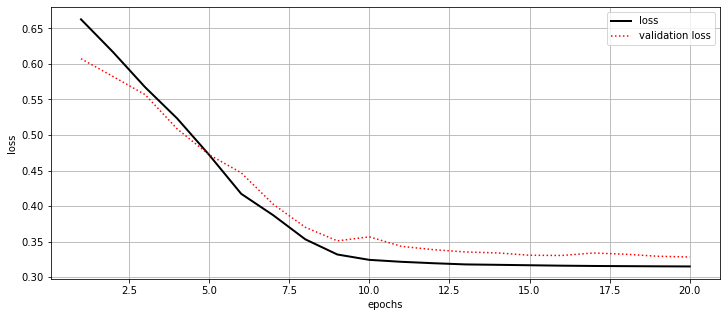

In [65]:
plot_training(history, metrics=['loss'])

**Which approach(es) did you find helpful to improve your model performance?**

In [ ]:
# your answer here